In [1]:
#importing cell

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import PIL.Image as Image 
import matplotlib.image as img
from IPython import display

-----------------------------

# Physical Models of Living Systems

#### *Rafaele Gaudio 2057974*

-----------------------------

## Week 9: - Deadline 9 January

Understand and run the code hopfield.py. Use stored images as memory patterns, and input images as initial conditions to retrieve the patterns. 

What pattern do you retrive if you use samir.jpg as input? And if you use superman?

Of course if you want to write your own code instead of using the one I give, is even better, but it is optional.

-----------------------------

_NOTE: the following code is a slightly modified version of the original hopfield.py._

## 1. Hopfield network implementation

The following code provides an implementation of the Hopfield network.

The $\mathtt{readPatterns}$ function take as input an image and convert it into a binary pattern vector of length N of $\pm 1\text{s}$. It also provides a visual rapresentation of the pattern as image of fixed size.

The $\mathtt{HopfieldNet}$ class defines the network with N neurons and a list of stored patterns. Such patterns are used to comput the weight matrix $W_{ij}$ using the Hebbian rule. This weights are then used to compute the energy of a given state of the network as:
$$
\mathcal{E} = \frac{1}{2}\sum_{i,j=1}^N W_{ij}\sigma_i\sigma_j + \sum_{i=1}^Nh_i\sigma_i\quad \qquad \sigma_i=\pm1 
$$ 

where $h_i$ is the characteristic activation threshold that in our implementation is set to 0. 

The network evolves through N/10 "Monte Carlo" steps:
- a random unit $i$ with state $\sigma_i$ is picked.
- the activation function is compute evaluating the nearest neighbors units of $i$ as:
$$
\sum_{j \in nn(i)} W_{ij}\sigma_j 
\begin {cases}
< h_i \implies \sigma_i=1\\
 \ge h_i \implies \sigma_i=-1
\end{cases}
$$
- we reiterate.

$\mathtt{animation Init}$ and $\mathtt{animation Update}$ are two auxiliary functions that are respectally used to inizialize the first frame of the network animation and to update the network calling the $\mathtt{evolve}$ function from the $\mathtt{HopfieldNet}$ class.

The $\mathtt{hamming Dist}$ function compute the Hamming distance between two vectors defined as:
$$
d_H(a,b) = \sum_i \begin{cases}
1 \quad \text{if} \quad a_i \not = b_i \\
0 \quad \text{if} \quad a_i = b_i
\end{cases}
$$

The $\mathtt{network Output}$ function returns some useful information about the network:
- the number of neurons
- the number of steps
- the Hamming distace between the final state and the stored patterns
- the similarity between the final state and the stored patterns defined as:
$$
\text{similarity}(a,b) = \frac{1-d_H(a,b)}{K} \quad\qquad \{K \in \N \quad|\quad \text{similarity}(a,b) \in [0,1]\}
$$
- the energy of the final state.



In [2]:
def readPatterns(fname, size, show = True):

# read an image and convert it to a binary pattern os size [Lx, Ly]: 
# arguments : @ figurename, 
# 			  @ final size=[Lx, Ly]
#			  @ if show is set True produce plot

	this_img = Image.open(fname) 						# open colour image
	this_img = this_img.convert('1') 					# convert image to black and white
	this_img = this_img.resize(size=[size[0],size[1]])	# resize it to have the dimensions [Lx, Ly]
	this_img.save("%s_converted.png"%fname) 			# save converted image

	matrix = img.imread("%s_converted.png"%fname) 		# re-read from the file and convert it to a matrix of [0.,1.]
	matrix = 2*matrix-1 						  		# convert from [0.,1.] -> [-1,1]

	if show == True:
		# plot the original and the converted file
		fig = plt.figure()
		
		# subplot on the left - original figure
		fig.add_subplot(1,2,1)		
		original = img.imread(fname)
		plt.imshow(original)
		plt.title("original")
		plt.axis('off');

		# subplot on the right - converted figure
		fig.add_subplot(1,2,2)		
		plt.matshow(matrix, cmap=plt.cm.gray,fignum=0)
		plt.axis('off')
		plt.title("simplified")
		plt.show();
	
	# Return the pattern as a 1D vector (not as a 2D a matrix)
	return matrix.flatten()

###############################################################################################################################

class HopfieldNet:
	
# arguments: @ number of neurons
# 			 @ list of patterns (vector of M components, each element of the pattern has to be an array of -1,+1 of size N)
	
	def __init__(self, N, patterns):
		self.N = N
		self.w = np.zeros([N,N]) 						# weights
		self.h = np.zeros(N) 							# threshold functions
		self.s = -np.ones(N) 							# default configuration = s[i]=-1
		
		# HEBBIAN RULE (h_i = 0., w_{ij} = sum_{k=1,...,M} s_i^k*s_j^k / M)
		self.M = len(patterns)
		for k in range(self.M):
			self.w += np.outer(patterns[k],patterns[k])/(1.*self.M)

 		# COMPUTE THE ENERGY 
		self.E = -0.5*np.sum(self.w) - np.sum(self.h) 	# energy for s_i = -1
		
		return


	# given and input s=[s_1,s_2,...,s_N], set the state of the network and recompute the energy
	def set_state(self, sinput):
		self.s = np.copy(sinput)

		# COMPUTE THE ENERGY 
		s2 = np.outer(self.s, self.s) 					# this returns a matrix s2[i,j]=s[i]*s[j]
		self.E = -0.5*np.sum(self.w*s2) + np.sum(self.h*self.s)
	
		return


	# evolve the state of the networks doing a number "steps" of Monte Carlo steps
	def evolve(self, steps):	
		for t in range(int(steps)):
			i = np.random.randint(self.N) 				# choose one node randomly
			sum_wijsj = np.sum(self.w[i,:]*self.s) 		# compute the argument of the activation function	
						
			if sum_wijsj < self.h[i]: 					# below the threshold
				self.s[i] = -1
			else: 										# above the threshold
				self.s[i] = 1
				
		return

###############################################################################################################################

def animation_init():  
	fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))

	return fig_mat


def animation_update(i):
	mynet.evolve(steps=N/10)  
	fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))

	return fig_mat

###############################################################################################################################

def hamming_distance(a, b):

# calculate the hamming distance between to vectors
# arguments: @ two vectors with same length

	if len(a) != len(b):
		raise Exception("vector must have the same length")
	else:
		dist = 0
		for i in range(len(a)):
			if a[i] != b[i]:
				dist += 1

	return dist


def network_output():
	print("----------------------------------------")
	print("number of neurons in the network:",mynet.N)
	print("----------------------------------------")
	print("number of steps:", int(mynet.N/10))
	print("----------------------------------------")
	for i, pattern in enumerate(patterns):
		d = hamming_distance(pattern,mynet.s)
		print("hamming distance with pattern",i,":",d)
	print("----------------------------------------")
	for i, pattern in enumerate(patterns):
		similarity = round(1-(hamming_distance(pattern,mynet.s)/len(pattern)),2)
		print("similarity with pattern",i,":",similarity)
	print("----------------------------------------")
	print("energy:", round(mynet.E,2))
	print("----------------------------------------")

###############################################################################################################################

def corrupted_input(array, noise_level, show=False):
    
# function that add white noise to a given input
# arguments : @ input array
#             @ noise level in range (0,1)
#			  @ if show is set True produce plot

    if noise_level < 0 or noise_level > 1:
        raise Exception("Error: Invalid noise level.\nExpected noise level: x::float, x in [0,1] ")

    elif noise_level == 0:
        matrix = array.reshape(Lx,Ly)
        
    else:
        l = np.absolute((-3)*noise_level + 3)
        rand_bits = np.random.normal(0, 1, size=len(array))
        noise_mask = np.abs(rand_bits) > l
        array[noise_mask] = (np.random.uniform(size=noise_mask.sum()) < 0.5) * 2 - 1
        matrix = array.reshape(Lx,Ly)

    if show:
        fig = plt.figure()
        plt.matshow(matrix, cmap=plt.cm.gray, fignum=0)
        plt.axis("off")
        plt.title("corrupted image")
        plt.show()

    return array	

## 2. Run the code

After setting the number of neurons, we convert some input images in binary patterns that will be learned by our network.

pattern 0 :


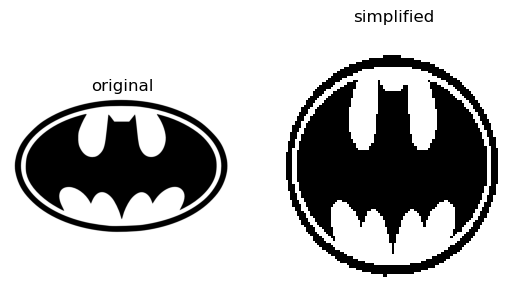

pattern 1 :


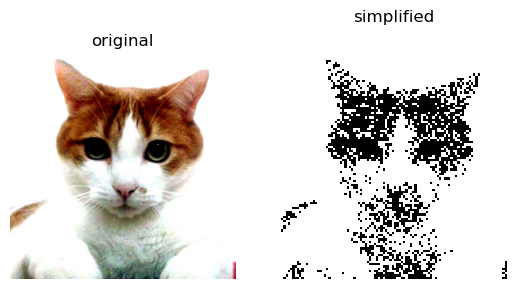

pattern 2 :


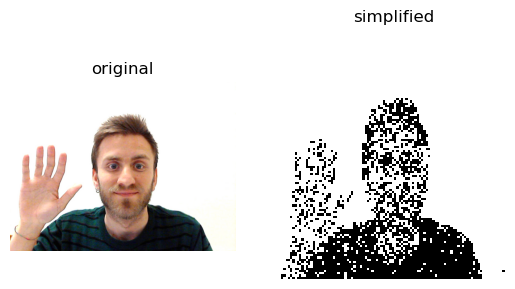

In [3]:
Lx = Ly = 100			# dimensions of the images
N = Lx*Ly 				# number of neurons			

## READ THE IMAGES AND CONVERT THEM TO BINARY PATTERNS
files = ["Hopfield/images/stored/batman.png", "Hopfield/images/stored/cat.jpg", "Hopfield/images/stored/jordi.jpg"]

patterns = []
for fname, i in zip(files,range(len(files))):
	print("pattern",i,":")
	patterns.append(readPatterns(fname, size=[Lx,Ly], show=True))

## CREATE THE NETWORK AND LEARN THE PREVIOUS PATTERNS
mynet = HopfieldNet(N, patterns)

In [4]:
patterns_energy = []

for i in range(len(patterns)):
    mynet.set_state(patterns[i])
    patterns_energy.append(round(mynet.E,2))
    
for i in range(len(patterns_energy)):
    print("energy of pattern",i,":",patterns_energy[i])

energy of pattern 0 : -16912853.84
energy of pattern 1 : -19058840.57
energy of pattern 2 : -18850285.9


### 2.1. samir.jpg input

Now the network should have learnd the patterns and it is ready to recive a new input image as initial condition. Let's start with $\mathtt{samir.jpg}$.

new input:


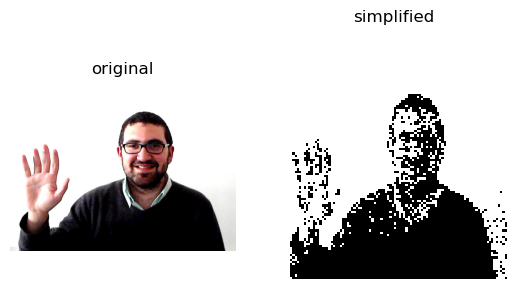

In [5]:
## SELECT NEW INPUT
print("new input:")
newinput = readPatterns("Hopfield/images/inputs/samir.jpg", size=[Lx,Ly], show=True)

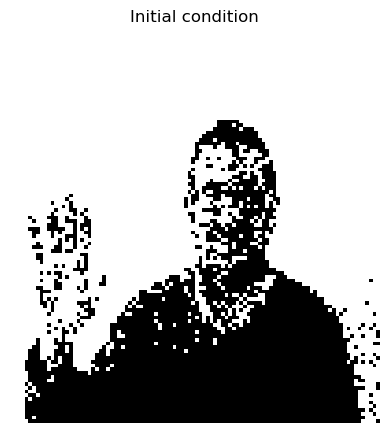

result of the evolution of the network:


----------------------------------------
number of neurons in the network: 10000
----------------------------------------
number of steps: 1000
----------------------------------------
hamming distance with pattern 0 : 5168
hamming distance with pattern 1 : 3198
hamming distance with pattern 2 : 0
----------------------------------------
similarity with pattern 0 : 0.48
similarity with pattern 1 : 0.68
similarity with pattern 2 : 1.0
----------------------------------------
energy: -5903463.51
----------------------------------------


In [6]:
mynet.set_state(newinput) 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) 
plt.title("Initial condition")
plt.axis('off')
plt.show()

## EVOLVE THE NETWORK
TOTAL_FRAMES = int(N/10)     	    # number of frames of the animation 
DT_FRAMES = 100 			        # duration of each frame (ms)

print("result of the evolution of the network:")

fig = plt.figure()
plt.axis('off')	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) 
ani = FuncAnimation(fig, animation_update, init_func=animation_init, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=False) 

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()
plt.show()

network_output()

As we can observe from the animation and from the output log, in this case the network correctly retrieve pattern 2.

### 2.2. superman.jpg input

Let's procede with another input like $\mathtt{superman.jpg}$.

new input:


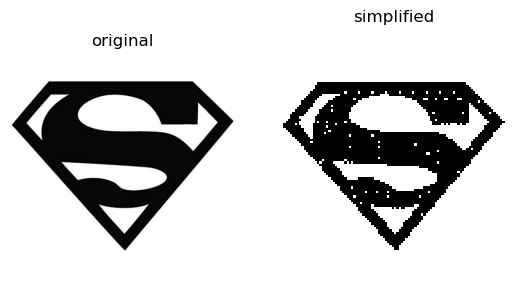

In [13]:
print("new input:")
newinput = readPatterns("Hopfield/images/inputs/superman.jpg", size=[Lx,Ly], show=True)

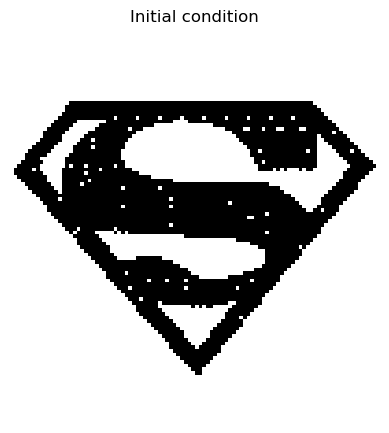

result of the evolution of the network:


----------------------------------------
number of neurons in the network: 10000
----------------------------------------
number of steps: 1000
----------------------------------------
hamming distance with pattern 0 : 3193
hamming distance with pattern 1 : 1223
hamming distance with pattern 2 : 1975
----------------------------------------
similarity with pattern 0 : 0.68
similarity with pattern 1 : 0.88
similarity with pattern 2 : 0.8
----------------------------------------
energy: -5256002.16
----------------------------------------


In [14]:
mynet.set_state(newinput) 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) 
plt.title("Initial condition")
plt.axis('off')
plt.show()

## EVOLVE THE NETWORK
TOTAL_FRAMES = int(N/10)     	    # number of frames of the animation 
DT_FRAMES = 100 			        # duration of each frame (ms)

print("result of the evolution of the network:")

fig = plt.figure()
plt.axis('off')	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) 
ani = FuncAnimation(fig, animation_update, init_func=animation_init, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=False) 

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()
plt.show()

network_output()

Given $\mathtt{superman.jpg}$ as new input, the network retrive a spurious pattern. This spurious pattern appears to be a linear combination of the three stored as we can see in the output log. We also note that, coherently, in this case the energy of the final state of the network is higher than the one we obtained in our previous test.

### 2.3. Corrupted input

Our last test is to introduce white noise to one of the stored patterns in order to see if the network can retrieve the original one correctly. For example, let's use pattern 1 ($\mathtt{cat.jpg}$).

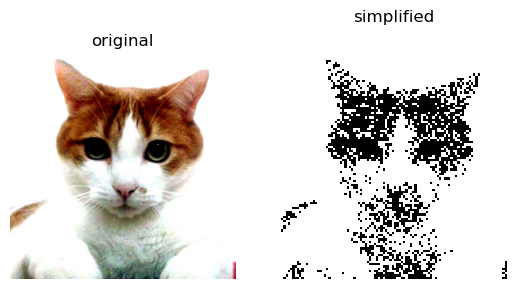

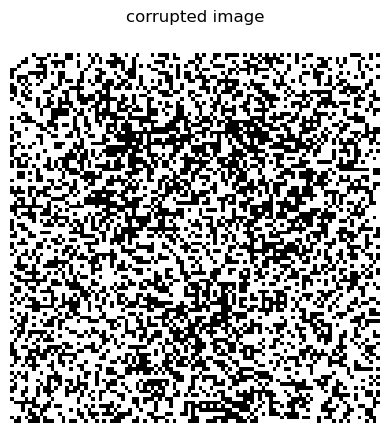

In [9]:
noise_level = 0.9 	            # noise_level = 1 is equivalent to a random noise input
							
newinput = readPatterns("Hopfield/images/stored/cat.jpg", size=[Lx,Ly], show=True)
newinput_corrupted = corrupted_input(newinput,noise_level=noise_level,show=True)

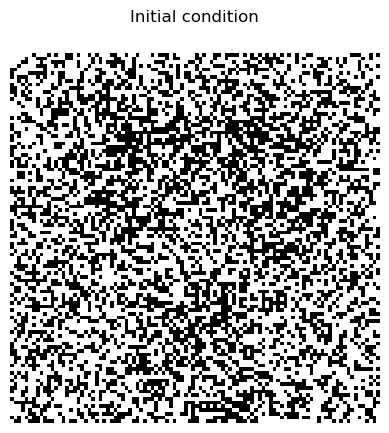

result of the evolution of the network:


----------------------------------------
number of neurons in the network: 10000
----------------------------------------
number of steps: 1000
----------------------------------------
hamming distance with pattern 0 : 4416
hamming distance with pattern 1 : 0
hamming distance with pattern 2 : 3198
----------------------------------------
similarity with pattern 0 : 0.56
similarity with pattern 1 : 1.0
similarity with pattern 2 : 0.68
----------------------------------------
energy: -997794.03
----------------------------------------


In [10]:
mynet.set_state(newinput_corrupted) 

plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) 
plt.title("Initial condition")
plt.axis('off')
plt.show()

## EVOLVE THE NETWORK
TOTAL_FRAMES = int(N/10)     	    # number of frames of the animation 
DT_FRAMES = 100 			        # duration of each frame (ms)

print("result of the evolution of the network:")

fig = plt.figure()
plt.axis('off')	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) 
ani = FuncAnimation(fig, animation_update, init_func=animation_init, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=False) 

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()
plt.show()

network_output()

Even with high noise levels the network correctly recovers the right pattern. Obviously setting the noise level to 1 is equivalent to random noise as input and the network fetches a randomly stored pattern or even spurious combination of them.